# Access and plot AROME Arctic weather forecasts

In [ ]:
# Activate the following in colab : 
!pip3 install netCDF4
!apt install proj-bin libproj-dev libgeos-dev
!pip install https://github.com/matplotlib/basemap/archive/master.zip
    
import xarray as xr

/home/maltem/.local/lib/python3.6/site-packages/pandas/compat/_optional.py:124: UserWarning: Pandas requires version '1.2.1' or newer of 'bottleneck' (version '1.2.0' currently installed).
  warnings.warn(msg, UserWarning)


##### Specify the file on the thredds server. For example the full file of latest forecast of the AROME Arctic weather model. Note, at this point only metadata is retrieved

In [ ]:
url='https://thredds.met.no/thredds/dodsC/aromearcticlatest/arome_arctic_full_2_5km_latest.nc'
dataset = xr.open_dataset(url)

### Metadata

In [ ]:
dataset

<xarray.Dataset>
Dimensions:                                                                      (atmosphere_as_single_layer: 1, grib1_vLevel6: 1, height0: 1, height1: 1, height2: 1, height3: 3, height4: 1, height5: 10, height6: 1, height7: 1, height_above_msl: 1, hybrid: 65, time: 67, top_of_atmosphere: 1, x: 739, y: 949)
Coordinates:
  * time                                                                         (time) datetime64[ns] ...
  * height_above_msl                                                             (height_above_msl) float32 ...
  * height0                                                                      (height0) float32 ...
  * height1                                                                      (height1) float32 ...
  * height2                                                                      (height2) float32 ...
  * height3                                                                      (height3) float32 ...
  * height4                                                                      (height4) float32 ...
  * height5                                                                      (height5) float32 ...
  * height6                                                                      (height6) float32 ...
  * height7                                                                      (height7) float32 ...
  * hybrid                                                                       (hybrid) float64 ...
  * atmosphere_as_single_layer                                                   (atmosphere_as_single_layer) int16 ...
  * grib1_vLevel6                                                                (grib1_vLevel6) float32 ...
  * top_of_atmosphere                                                            (top_of_atmosphere) int16 ...
  * x                                                                            (x) float32 ...
  * y                                                                            (y) float32 ...
    longitude                                                                    (y, x) float64 ...
    latitude                                                                     (y, x) float64 ...
Data variables:
    forecast_reference_time                                                      datetime64[ns] ...
    p0                                                                           float64 ...
    ap                                                                           (hybrid) float64 ...
    b                                                                            (hybrid) float64 ...
    projection_lambert                                                           int32 ...
    liquid_water_content_of_surface_snow                                         (time, height0, y, x) float32 ...
    air_temperature_0m                                                           (time, height0, y, x) float32 ...
    land_area_fraction                                                           (time, height0, y, x) float32 ...
    surface_aerosol_sea                                                          (time, height0, y, x) float32 ...
    surface_aerosol_land                                                         (time, height0, y, x) float32 ...
    surface_aerosol_soot                                                         (time, height0, y, x) float32 ...
    surface_aerosol_desert                                                       (time, height0, y, x) float32 ...
    ozone_profile_a                                                              (time, height0, y, x) float32 ...
    ozone_profile_b                                                              (time, height0, y, x) float32 ...
    ozone_profile_c                                                              (time, height0, y, x) float32 ...
    specific_humidity_ml                                                         (time, hybrid, y, x) float64 ...
    mass_fract

### Find a specific point and plot the forecast. 
###### Note AROME Arctic is on an irregular grid, so the xarray.sel functionality does not work:

In [ ]:
import math
import numpy as np

def findindex(alat,alon,plat,plon):
    #finding identical location of pos plat, plon in array alat[],alon[]
    abslat = np.abs(alat-plat)
    abslon = np.abs(alon-plon)
    c = np.maximum(abslon,abslat)
    x, y = np.where(c == np.min(c))
    #print(alats[x,y],alon[x,y])
    x=int(x)
    y=int(y)
   
    return (x,y)

In [ ]:
[ix,jx] = findindex(dataset.latitude,dataset.longitude,78.24,15.46) # For example for Longyearbyen

In [ ]:
t2m_point = dataset.air_temperature_2m[:,0,ix,jx]

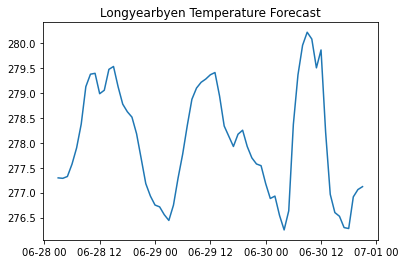

In [ ]:
from matplotlib import pyplot as plt

plt.plot(dataset.time, t2m_point, '-')

plt.title("Longyearbyen Temperature Forecast")
plt.show()

### Plot one forecast on a map

/usr/lib/python3/dist-packages/ipykernel_launcher.py:19: UserWarning: The following kwargs were not used by contour: 'extemd'


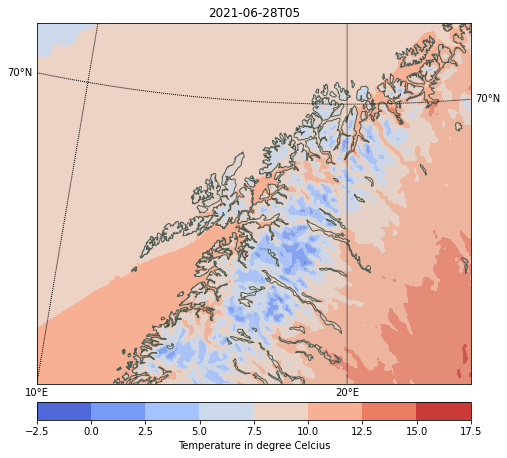

In [ ]:
from mpl_toolkits.basemap import Basemap
import matplotlib.gridspec as gridspec

timestep = 2
fig = plt.figure(figsize=(14.4,7.2)) #11.7
plt.subplots_adjust(left=0.05, right=0.95, top=0.90, bottom=0.05, wspace=0.15, hspace=0.05)
ax = plt.subplot(121)
m = Basemap(projection='stere', 
            boundinglat=60, lon_0=20, lat_0=78.4, 
            resolution='h', 
            llcrnrlat= 66.0, urcrnrlat=71.0, llcrnrlon=10.0, urcrnrlon=25.0)
 
m.drawcoastlines(color='#4D5D53'); m.fillcontinents(alpha=0.2)
parallels = np.arange(0.,90,10); m.drawparallels(parallels,labels=[1,1,1,0],fontsize=10)
meridians = np.arange(0.,360.,10); m.drawmeridians(meridians,labels=[0,0,0,1],latmax=80,fontsize=10)

x, y = m(np.array(dataset.longitude),np.array(dataset.latitude))               # compute map proj coordinates.

cs=m.contourf(x,y,np.array( dataset.air_temperature_2m[timestep,0,:,:])-273.15,cmap=plt.cm.coolwarm,extemd='max')
plt.title (np.datetime_as_string(dataset.time[timestep],unit='h'))
cbar = m.colorbar(cs,location='bottom',pad="5%")  
cbar.set_label('Temperature in degree Celcius') 